### Tarea 1

## *Luis Pavón*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA

from math import sqrt
import matplotlib
from random import random

## ejercicio 5

Dada la serie de tiempo:
53,43,66,48,52,42,44,56,44,58,41,54,51,56,38,56,49,52,32,52,59,34,57,39,60,40,52,44,65,43


a) Grafica la serie.


b) Calcular $\rho_k$ , para  k=0,1,2,3,4,5


c) Calcular la PACF $\hat{\phi_{k,k}}$ , para k=0,1,2,3,4,5

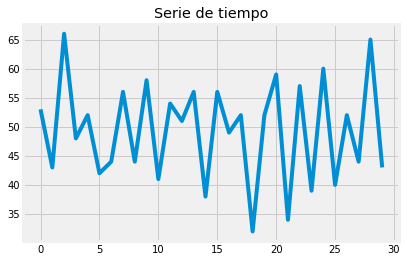

In [2]:
#a)
X_t=[53,43,66,48,52,42,44,56,44,58,41,54,51,56,38,56,49,52,32,52,59,34,57,39,60,40,52,44,65,43]


plt.plot(X_t)
plt.title('Serie de tiempo')
plt.savefig('Serie.png',format='png')
plt.show()


In [3]:
# b)

X_t_k=pd.DataFrame(X_t,columns=['X'])
X_t_k['Xt-1']=X_t_k['X'].shift(1)
X_t_k['Xt-2']=X_t_k['X'].shift(2)
X_t_k['Xt-3']=X_t_k['X'].shift(3)
X_t_k['Xt-4']=X_t_k['X'].shift(4)
X_t_k['Xt-5']=X_t_k['X'].shift(5)


In [4]:
Covs=X_t_k.cov()
Covs

,X,Xt-1,Xt-2,Xt-3,Xt-4,Xt-5
X,76.298851,-47.903941,24.666667,-27.349003,28.092308,-9.955000
Xt-1,-47.903941,77.541872,-46.000000,24.333333,-27.763077,26.963333
Xt-2,24.666667,-46.000000,71.259259,-44.663818,23.513846,-22.641667
Xt-3,-27.349003,24.333333,-44.663818,73.002849,-45.883077,22.496667
Xt-4,28.092308,-27.763077,23.513846,-45.883077,75.593846,-46.630000
Xt-5,-9.955000,26.963333,-22.641667,22.496667,-46.630000,75.173333


In [5]:
Rho_1=(Covs['X']['Xt-1'])/ ((X_t_k['X'].std())*(X_t_k['Xt-1'].std()))
Rho_2=(Covs['X']['Xt-2'])/ ((X_t_k['X'].std())*(X_t_k['Xt-2'].std()))
Rho_3=(Covs['X']['Xt-3'])/ ((X_t_k['X'].std())*(X_t_k['Xt-3'].std()))
Rho_4=(Covs['X']['Xt-4'])/ ((X_t_k['X'].std())*(X_t_k['Xt-4'].std()))
Rho_5=(Covs['X']['Xt-5'])/ ((X_t_k['X'].std())*(X_t_k['Xt-5'].std()))
Rho_k=[Rho_1,Rho_2,Rho_3,Rho_4,Rho_5]

#Complementar con texto
Rho_k

[-0.6227935476974266,
 0.33452672244148296,
 -0.36644820116966775,
 0.3699007378383708,
 -0.1314469043154543]

In [6]:
#Sigma
sig_1_1=Rho_1
sig_2_2=(Rho_2-sig_1_1*Rho_1)/(1-(sig_1_1*Rho_1))
sig_2_1=sig_1_1-(sig_2_2*sig_1_1)
sig_3_3=(Rho_3-((sig_2_1*Rho_2)+(sig_2_2*Rho_1)))/(1-((sig_2_1*Rho_1)+(sig_2_2*Rho_2)))
sig_3_2=sig_2_2-(sig_3_3*sig_2_1)
sig_3_1=sig_2_1-(sig_3_3*sig_2_2)
sig_4_4=(Rho_4-((sig_3_1*Rho_3)+(sig_3_2*Rho_2)+(sig_3_3*Rho_1)))/(1-((sig_3_1*Rho_1)+(sig_3_2*Rho_2)+(sig_3_3*Rho_3)))
sig_4_3=sig_3_3-(sig_4_4*sig_3_1)
sig_4_2=sig_3_2-(sig_4_4*sig_3_2)
sig_4_1=sig_3_1-(sig_4_4*sig_3_3)
sig_5_5=(Rho_5-((sig_4_1*Rho_4)+(sig_4_2*Rho_3)+(sig_4_3*Rho_2)+(sig_4_4*Rho_1)))/(1-((sig_4_1*Rho_1)+(sig_4_2*Rho_2)+(sig_4_3*Rho_3)+(sig_4_4*Rho_4)))

#Complementar con texto

### Ejercicio 10

In [23]:
## Genera 1000 observaciones de los siguientes modelos

#A
W=np.random.randn(1000)
X_t_1=np.zeros(1000)

for t in range(1,len(W)):
    X_t_1[t]=(0.5)*X_t_1[t-1]+W[t]
    
#B  
W=np.random.randn(1000)
X_t_2=np.zeros(1001)

for t in range(2,len(W)):
    X_t_2[t]=(0.25)*X_t_1[t-1]+(0.3)*X_t_1[t-2]+W[t]
    
#C
W=np.random.randn(1000)
X_t_3=np.zeros(1001)

for t in range(1,len(W)):
    X_t_3[t]=(0.13)*W[t-1]+W[t]
    
    
#D
W=np.random.randn(1000)
X_t_4=np.zeros(1001)

for t in range(2,len(W)):
    X_t_4[t]=(0.23)*W[t-1]+(0.3)*W[t-2]+W[t]

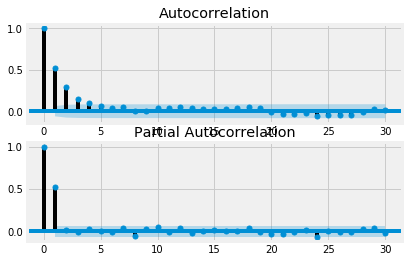

In [16]:


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()

pyplot.subplot(211)
plot_acf(X_t_1, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(X_t_1 ,ax=pyplot.gca(), lags = 30)
pyplot.savefig('ACF_PACF_1.png', format='png')
pyplot.show()



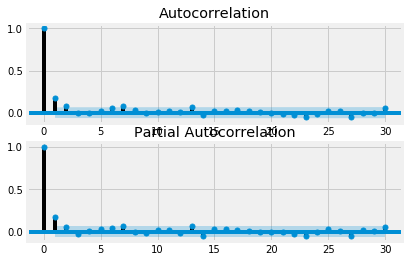

In [17]:


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()

pyplot.subplot(211)
plot_acf(X_t_2, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(X_t_2 ,ax=pyplot.gca(), lags = 30)
pyplot.savefig('ACF_PACF_2.png', format='png')
pyplot.show()



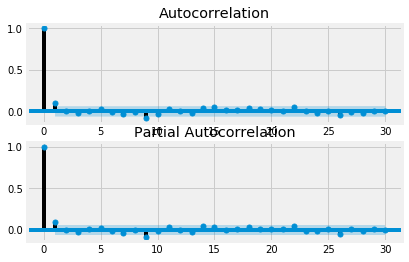

In [25]:


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()

pyplot.subplot(211)
plot_acf(X_t_3, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(X_t_3 ,ax=pyplot.gca(), lags = 30)
pyplot.savefig('ACF_PACF_3.png', format='png')
pyplot.show()



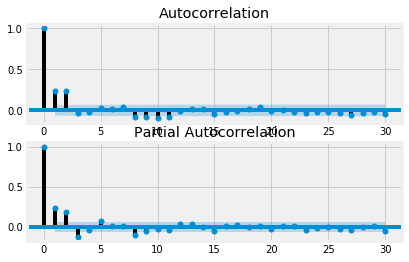

In [26]:


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()

pyplot.subplot(211)
plot_acf(X_t_4, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(X_t_4 ,ax=pyplot.gca(), lags = 30)
pyplot.savefig('ACF_PACF_4.png', format='png')
pyplot.show()



In [27]:
#Calculo de ACF
Rho_k=np.zeros(15)
phi=0.5 

for i in range(15):
    Rho_k[i]=phi**i

phi=np.zeros((15,15))



In [ ]:
def PACF(n):  ##Función para calculo de PACF pendiente
    Rho_k=np.zeros(n)
    phi_n=0.5  #Cambiar nombre
    for i in range(1,n):
        Rho_k[i-1]=phi_n**i
    phi=np.zeros((n,n))
    phi[0][0]=Rho_k[0]
    suma=0
    suma_2=0
    for k in range(1,n):
        for j in range(1,k):
            if j==k:
                for l in range(1,i+1):
                    suma= phi[i][l]*Rho_k[i+1-l]+suma
                    suma_2=phi[i][l]*Rho_k[l]+suma_2
                phi[1][1]=(Rho_k[2]-suma)/(1-suma_2) 
    return phi, Rho_k